In [88]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Import data

In [89]:
#13k top spotify songs 
df=pd.read_csv('data/df.csv', sep=",")
#users favorite tracks based on time 
df_fav=pd.read_csv('data/df_fav.csv', sep=",")

In [90]:
# Create new column with minutes listened to
df['minutes'] = df['length'] / 60000
df_fav['minutes'] = df_fav['length'] / 60000

# Calculate beat density (beats per minute)
df['beat_density'] = df['tempo'] / df['minutes']
df_fav['beat_density'] = df_fav['tempo'] / df_fav['minutes']
#Popularity Rank
df['Popularity_Rank'] = df['Popularity'].rank(ascending=False)
df_fav['Popularity_Rank'] = df_fav['Popularity'].rank(ascending=False)


df['melody_complexity'] = df['tempo'] * df['time_signature']
df_fav['melody_complexity'] = df_fav['tempo'] * df_fav['time_signature']

df['instrumental_acoustic_ratio'] = df['instrumentalness'] / df['acousticness']
df_fav['instrumental_acoustic_ratio'] = df_fav['instrumentalness'] / df_fav['acousticness']


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12476 entries, 0 to 12475
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   track_id                     12476 non-null  object 
 1   Song                         12476 non-null  object 
 2   Artists                      12476 non-null  object 
 3   Album                        12476 non-null  object 
 4   length                       12476 non-null  int64  
 5   time_signature               12476 non-null  int64  
 6   danceability                 12476 non-null  float64
 7   acousticness                 12476 non-null  float64
 8   energy                       12476 non-null  float64
 9   tempo                        12476 non-null  float64
 10  instrumentalness             12476 non-null  float64
 11  loudness                     12476 non-null  float64
 12  liveness                     12476 non-null  float64
 13  key             

In [92]:
df = pd.concat([df, df_fav])

In [93]:
df.shape

(12594, 24)

In [94]:
df

,track_id,Song,Artists,Album,length,time_signature,danceability,acousticness,energy,tempo,...,valence,speechiness,mode,Popularity,favorite,minutes,beat_density,Popularity_Rank,melody_complexity,instrumental_acoustic_ratio
0,3rUGC1vUpkDG9CZFHMur1t,greedy,['Tate McRae'],greedy,131872,1,0.750,0.2560,0.733,111.018000,...,0.844,0.0319,0,98.000,0,2.197867,5.051171e+01,4.5,111.018000,0.000000
1,7aqfrAY2p9BUSiupwk3svU,First Person Shooter (feat. J. Cole),"['Drake', 'J. Cole']",For All The Dogs,247444,4,0.470,0.0277,0.640,163.920000,...,0.248,0.3200,1,91.000,0,4.124067,3.974718e+01,49.5,655.680000,0.000000
2,7dJYggqjKo71KI9sLzqCs8,Agora Hills,['Doja Cat'],Scarlet,265360,4,0.750,0.2280,0.674,123.026000,...,0.392,0.0970,0,89.000,0,4.422667,2.781715e+01,89.5,492.104000,0.000391
3,4MjDJD8cW7iVeWInc2Bdyj,MONACO,['Bad Bunny'],nadie sabe lo que va a pasar mañana,267194,4,0.787,0.1500,0.621,139.056000,...,0.130,0.0680,0,94.000,0,4.453233,3.122585e+01,21.0,556.224000,0.002680
4,5aIVCx5tnk0ntmdiinnYvw,Water,['Tyla'],Water,200256,4,0.673,0.0856,0.722,117.187000,...,0.519,0.0755,0,92.000,0,3.337600,3.511116e+01,37.5,468.748000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,5R2rsbwCDXORX2tLfprRmM,Yacht Club (feat. Juice WRLD),Lil Yachty,Nuthin' 2 Prove,166343,72,0.721,0.3170,0.508,0.000000,...,4.000,1.0000,7,0.457,1,2.772383,0.000000e+00,39.0,0.000000,0.482650
114,6DZz58CbF0AKw5PCKqNKcM,Come to Life,Kanye West,Donda,310393,0,0.440,0.6890,0.465,0.000001,...,4.000,1.0000,3,0.241,1,5.173217,2.435622e-07,69.0,0.000000,0.557329
115,3CA9pLiwRIGtUBiMjbZmRw,Nice For What,Drake,Scorpion,210746,82,0.585,0.0891,0.909,0.000097,...,4.000,1.0000,8,0.758,1,3.512433,2.761618e-05,10.0,0.007954,1.335578
116,27GmP9AWRs744SzKcpJsTZ,Jumpman,Drake,What A Time To Be Alive,205879,74,0.852,0.0559,0.553,0.000000,...,4.000,1.0000,1,0.656,1,3.431317,0.000000e+00,21.0,0.000000,5.939177


In [95]:
# Dropping columns that could lead to data leakage
df_num= df.drop(columns=['track_id','Song', 'Album', 'Artists' ])

In [96]:
df_cat = df[['track_id', 'Song', 'Album', 'Artists']]

## Hot encoding 

In [97]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [98]:
df_hot = df 

In [99]:
# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

# Reshape the 'artists' column
artists_column = df_hot['Artists'].values.reshape(-1, 1)

# Fit and transform the one-hot encoding on the 'artists' column
one_hot_encoded_artists = one_hot_encoder.fit_transform(artists_column)
a
df_hot['artists'] = np.argmax(one_hot_encoded_artists, axis=1)


In [100]:
#albums 


# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

# Reshape the 'artists' column
artists_column = df_hot['Album'].values.reshape(-1, 1)

# Fit and transform the one-hot encoding on the 'artists' column
one_hot_encoded_artists = one_hot_encoder.fit_transform(artists_column)

df_hot['album'] = np.argmax(one_hot_encoded_artists, axis=1)


In [101]:
# Assuming df_hot is the DataFrame you're working with
desired_column_order = ['track_id','length', 'artists', 'album', 'time_signature', 'danceability', 'acousticness', 'energy', 'tempo', 'instrumentalness', 'loudness', 'liveness', 'key', 'valence', 'speechiness', 'mode', 'Popularity', 'minutes', 'beat_density','Popularity_Rank','melody_complexity','instrumental_acoustic_ratio','favorite']

# Reorder columns in the DataFrame
df_hot = df_hot[desired_column_order]


In [102]:
df= df.drop(columns=['artists',	'album' ])

In [103]:
df_hot.head()

,track_id,length,artists,album,time_signature,danceability,acousticness,energy,tempo,instrumentalness,...,valence,speechiness,mode,Popularity,minutes,beat_density,Popularity_Rank,melody_complexity,instrumental_acoustic_ratio,favorite
0,3rUGC1vUpkDG9CZFHMur1t,131872,7016,9646,1,0.750,0.2560,0.733,111.018,0.000000,...,0.844,0.0319,0,98.0,2.197867,50.511708,4.5,111.018,0.000000,0
1,7aqfrAY2p9BUSiupwk3svU,247444,2075,2891,4,0.470,0.0277,0.640,163.920,0.000000,...,0.248,0.3200,1,91.0,4.124067,39.747175,49.5,655.680,0.000000,0
2,7dJYggqjKo71KI9sLzqCs8,265360,2007,7025,4,0.750,0.2280,0.674,123.026,0.000089,...,0.392,0.0970,0,89.0,4.422667,27.817154,89.5,492.104,0.000391,0
3,4MjDJD8cW7iVeWInc2Bdyj,267194,742,9691,4,0.787,0.1500,0.621,139.056,0.000402,...,0.130,0.0680,0,94.0,4.453233,31.225851,21.0,556.224,0.002680,0
4,5aIVCx5tnk0ntmdiinnYvw,200256,7579,9135,4,0.673,0.0856,0.722,117.187,0.000000,...,0.519,0.0755,0,92.0,3.337600,35.111158,37.5,468.748,0.000000,0


In [104]:
df_hot.to_csv('data/df_hot.csv', index=False)

In [105]:
df_hot_num= df_hot.drop(columns=['track_id' ])

In [106]:
corr = df_hot_num.corr()
corr.style.background_gradient(cmap='coolwarm')

,length,artists,album,time_signature,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,key,valence,speechiness,mode,Popularity,minutes,beat_density,Popularity_Rank,melody_complexity,instrumental_acoustic_ratio,favorite
length,1.000000,-0.008983,-0.001882,-0.032079,-0.291032,0.245579,-0.266986,-0.100453,0.267301,-0.288331,-0.046754,-0.033598,-0.174053,-0.108125,0.000806,-0.194682,1.000000,-0.519352,0.212893,-0.113289,-0.005410,-0.030234
artists,-0.008983,1.000000,0.058259,-0.163912,-0.027774,-0.024876,0.040306,0.083361,-0.025271,0.039659,0.025086,-0.157273,-0.113484,-0.080025,-0.082651,0.053177,-0.008983,0.073615,0.016042,0.078417,0.006096,-0.168110
album,-0.001882,0.058259,1.000000,0.007713,-0.028183,0.047164,-0.044674,-0.006696,0.012330,-0.037943,0.005318,0.008115,-0.006469,-0.013033,0.010263,-0.022219,-0.001882,0.001315,0.022292,-0.010660,0.005092,0.007050
time_signature,-0.032079,-0.163912,0.007713,1.000000,0.098211,-0.053774,0.011488,-0.354969,-0.002060,0.042965,-0.008512,0.913523,0.781417,0.405236,0.512862,-0.227601,-0.032079,-0.174637,-0.167969,-0.302665,-0.003451,0.971982
danceability,-0.291032,-0.027774,-0.028183,0.098211,1.000000,-0.479613,0.421915,0.038705,-0.288730,0.497853,-0.020742,0.083453,0.377975,0.232150,-0.039652,0.274074,-0.291032,0.128705,-0.318992,0.111603,-0.039340,0.083934
acousticness,0.245579,-0.024876,0.047164,-0.053774,-0.479613,1.000000,-0.845074,-0.257731,0.366818,-0.777826,-0.137243,-0.049008,-0.242759,-0.111478,0.055468,-0.318250,0.245579,-0.138015,0.329993,-0.323482,-0.039205,-0.037923
energy,-0.266986,0.040306,-0.044674,0.011488,0.421915,-0.845074,1.000000,0.306143,-0.351459,0.851628,0.201977,0.008998,0.247958,0.099899,-0.067574,0.301593,-0.266986,0.192647,-0.294799,0.369593,0.039256,-0.003962
tempo,-0.100453,0.083361,-0.006696,-0.354969,0.038705,-0.257731,0.306143,1.000000,-0.121086,0.265663,0.066720,-0.348380,-0.212988,-0.101379,-0.198533,0.203514,-0.100453,0.530243,-0.046155,0.929364,0.005168,-0.371333
instrumentalness,0.267301,-0.025271,0.012330,-0.002060,-0.288730,0.366818,-0.351459,-0.121086,1.000000,-0.533006,-0.099570,0.004563,-0.201461,-0.131155,-0.007469,-0.287697,0.267301,-0.132298,0.309097,-0.149084,0.073029,0.005347
loudness,-0.288331,0.039659,-0.037943,0.042965,0.497853,-0.777826,0.851628,0.265663,-0.533006,1.000000,0.155501,0.032722,0.261172,0.121559,-0.037746,0.356414,-0.288331,0.167183,-0.368028,0.326621,0.012238,0.027500


In [107]:
df_hot.head()

,track_id,length,artists,album,time_signature,danceability,acousticness,energy,tempo,instrumentalness,...,valence,speechiness,mode,Popularity,minutes,beat_density,Popularity_Rank,melody_complexity,instrumental_acoustic_ratio,favorite
0,3rUGC1vUpkDG9CZFHMur1t,131872,7016,9646,1,0.750,0.2560,0.733,111.018,0.000000,...,0.844,0.0319,0,98.0,2.197867,50.511708,4.5,111.018,0.000000,0
1,7aqfrAY2p9BUSiupwk3svU,247444,2075,2891,4,0.470,0.0277,0.640,163.920,0.000000,...,0.248,0.3200,1,91.0,4.124067,39.747175,49.5,655.680,0.000000,0
2,7dJYggqjKo71KI9sLzqCs8,265360,2007,7025,4,0.750,0.2280,0.674,123.026,0.000089,...,0.392,0.0970,0,89.0,4.422667,27.817154,89.5,492.104,0.000391,0
3,4MjDJD8cW7iVeWInc2Bdyj,267194,742,9691,4,0.787,0.1500,0.621,139.056,0.000402,...,0.130,0.0680,0,94.0,4.453233,31.225851,21.0,556.224,0.002680,0
4,5aIVCx5tnk0ntmdiinnYvw,200256,7579,9135,4,0.673,0.0856,0.722,117.187,0.000000,...,0.519,0.0755,0,92.0,3.337600,35.111158,37.5,468.748,0.000000,0


In [108]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Assuming X contains your feature data and y contains the target variable
# X should be a pandas DataFrame or a NumPy array
# y should be a pandas Series or a NumPy array

X = df_hot_num.drop('favorite', axis=1)  # X contains all columns except the 'favorite' column
y = df_hot_num['favorite'] 

# Initialize the Random Forest Classifier
rf = RandomForestClassifier()

# Fit the model with your data
rf.fit(X, y)

# Retrieve feature importance
feature_importances = rf.feature_importances_

# Create a DataFrame to better visualize feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Set a threshold for feature importance
threshold = 0.05  # Adjust this value according to your requirements

# Select features based on the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature']

# Use selected features for your classification model
X_selected = X[selected_features]


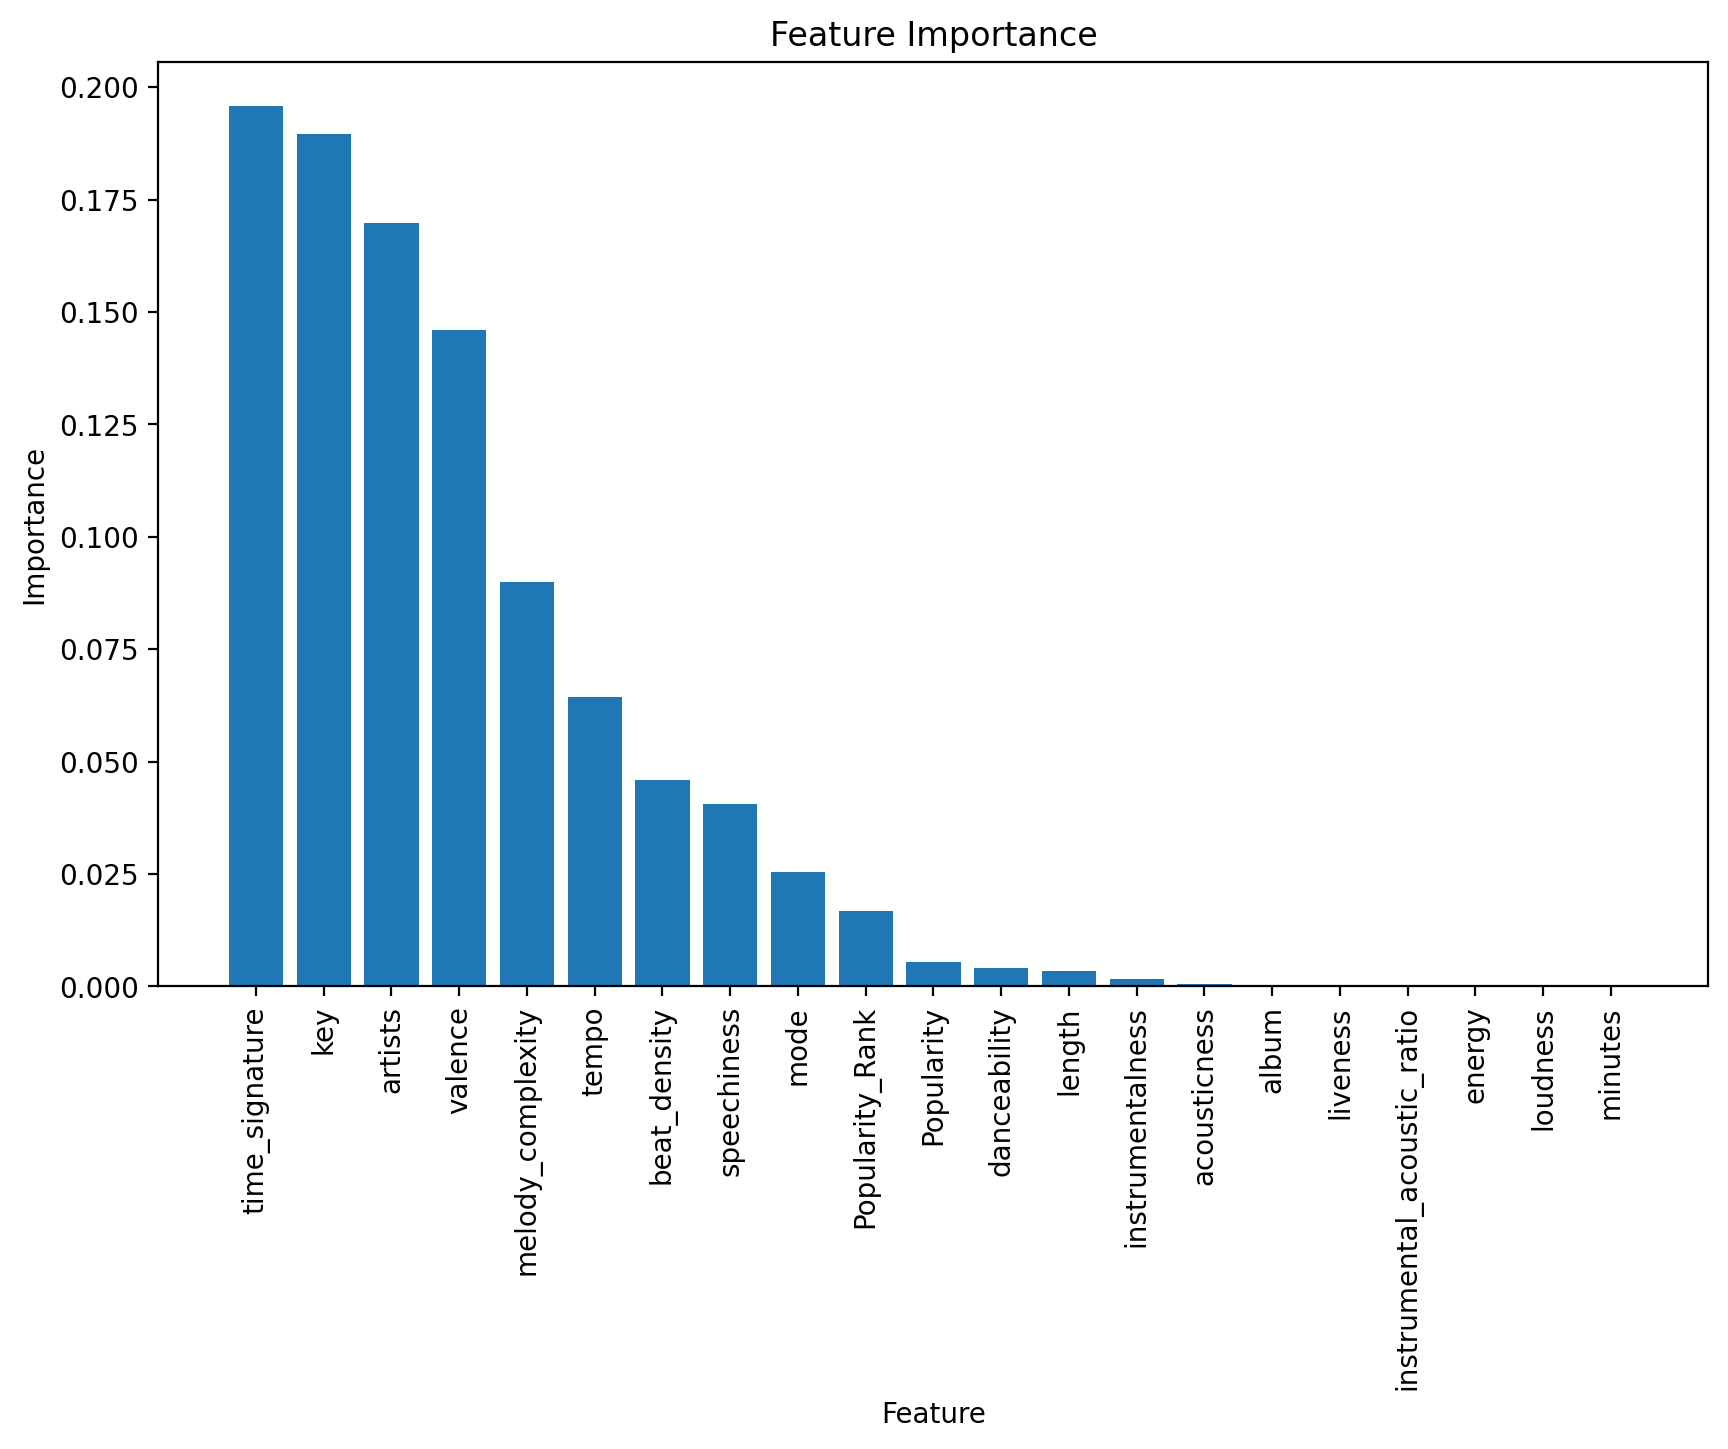

In [109]:
import matplotlib.pyplot as plt

# Assuming 'rf' is your trained Random Forest model
feature_importance = rf.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.xticks(range(len(feature_importance)), X.columns[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


In [110]:

import pandas as pd
import numpy as np

corr = X_selected.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,time_signature,key,artists,valence,melody_complexity,tempo
time_signature,1.000000,0.913523,-0.163912,0.781417,-0.302665,-0.354969
key,0.913523,1.000000,-0.157273,0.759064,-0.319715,-0.348380
artists,-0.163912,-0.157273,1.000000,-0.113484,0.078417,0.083361
valence,0.781417,0.759064,-0.113484,1.000000,-0.162166,-0.212988
melody_complexity,-0.302665,-0.319715,0.078417,-0.162166,1.000000,0.929364
tempo,-0.354969,-0.348380,0.083361,-0.212988,0.929364,1.000000


### PCA

In [111]:
df_hot_num

,length,artists,album,time_signature,danceability,acousticness,energy,tempo,instrumentalness,loudness,...,valence,speechiness,mode,Popularity,minutes,beat_density,Popularity_Rank,melody_complexity,instrumental_acoustic_ratio,favorite
0,131872,7016,9646,1,0.750,0.2560,0.733,111.018000,0.000000,-3.180,...,0.844,0.0319,0,98.000,2.197867,5.051171e+01,4.5,111.018000,0.000000,0
1,247444,2075,2891,4,0.470,0.0277,0.640,163.920000,0.000000,-7.779,...,0.248,0.3200,1,91.000,4.124067,3.974718e+01,49.5,655.680000,0.000000,0
2,265360,2007,7025,4,0.750,0.2280,0.674,123.026000,0.000089,-6.128,...,0.392,0.0970,0,89.000,4.422667,2.781715e+01,89.5,492.104000,0.000391,0
3,267194,742,9691,4,0.787,0.1500,0.621,139.056000,0.000402,-5.009,...,0.130,0.0680,0,94.000,4.453233,3.122585e+01,21.0,556.224000,0.002680,0
4,200256,7579,9135,4,0.673,0.0856,0.722,117.187000,0.000000,-3.495,...,0.519,0.0755,0,92.000,3.337600,3.511116e+01,37.5,468.748000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,166343,15,5774,72,0.721,0.3170,0.508,0.000000,0.153000,-7.496,...,4.000,1.0000,7,0.457,2.772383,0.000000e+00,39.0,0.000000,0.482650,1
114,310393,12,2325,0,0.440,0.6890,0.465,0.000001,0.384000,-6.592,...,4.000,1.0000,3,0.241,5.173217,2.435622e-07,69.0,0.000000,0.557329,1
115,210746,6,7135,82,0.585,0.0891,0.909,0.000097,0.119000,-6.474,...,4.000,1.0000,8,0.758,3.512433,2.761618e-05,10.0,0.007954,1.335578,1
116,205879,6,9212,74,0.852,0.0559,0.553,0.000000,0.332000,-7.286,...,4.000,1.0000,1,0.656,3.431317,0.000000e+00,21.0,0.000000,5.939177,1


#### Examining the Relationship between Features and Target

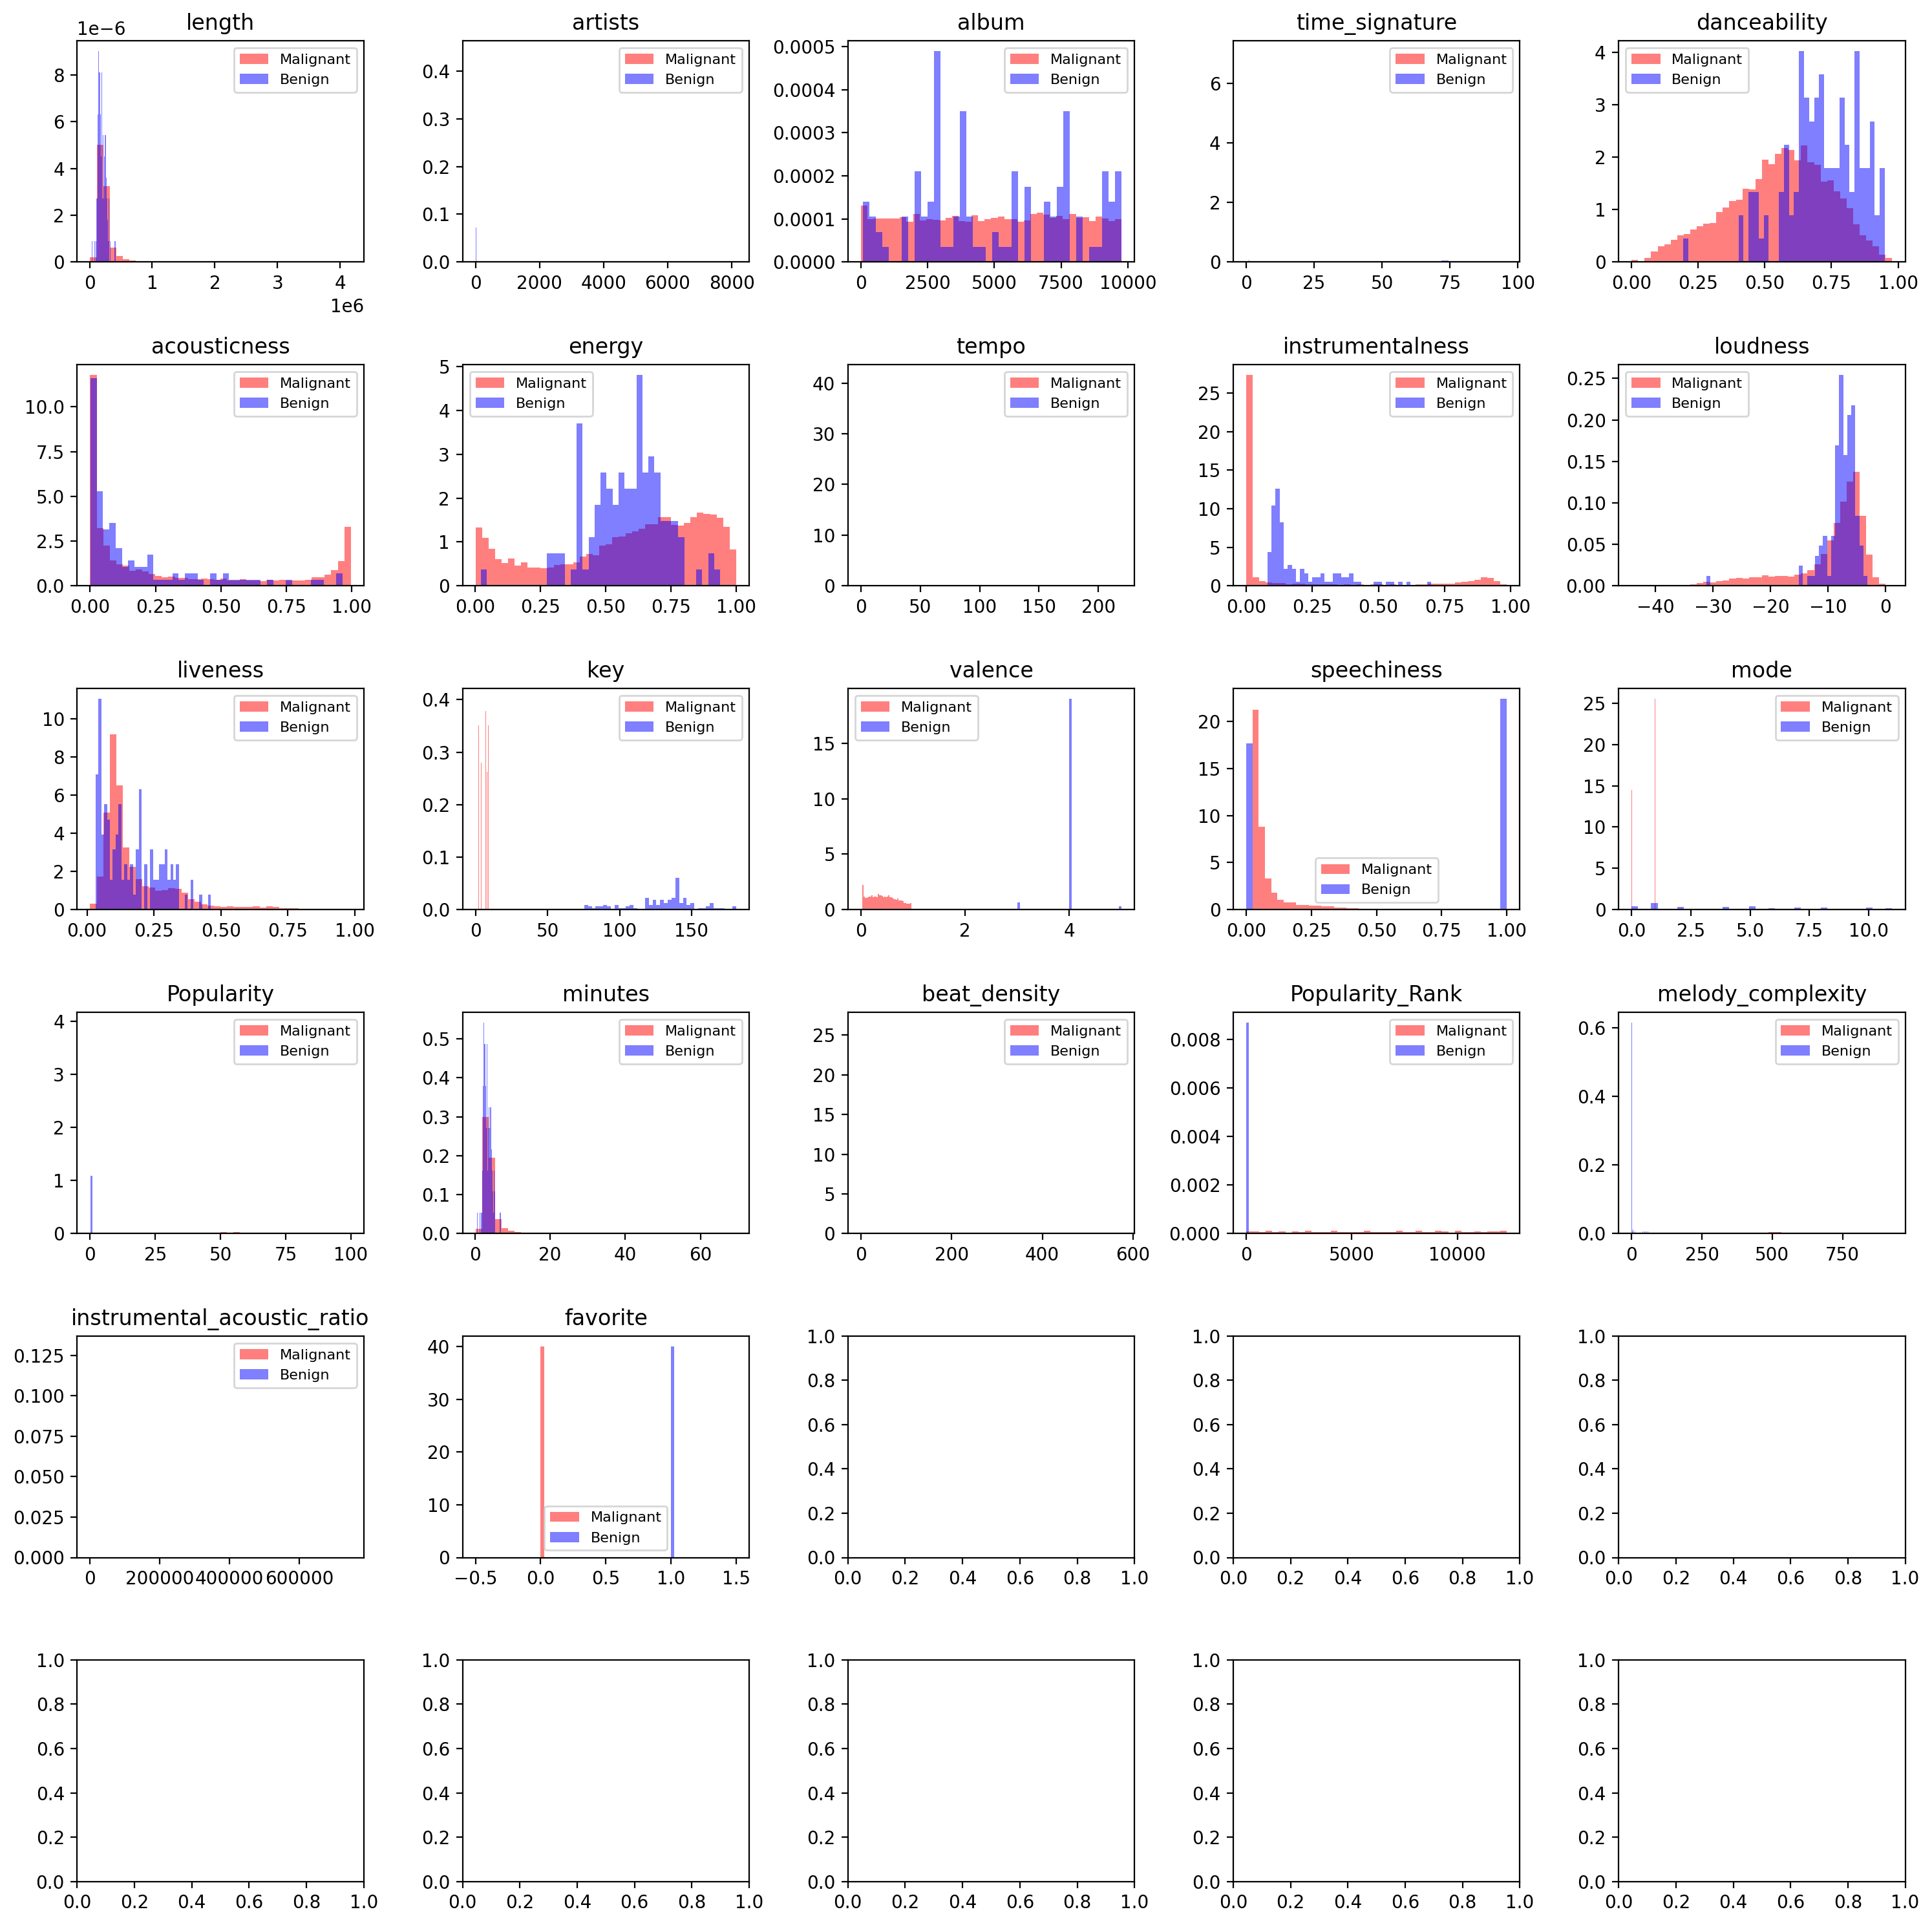

In [114]:
import numpy as np
import matplotlib.pyplot as plt

_, axes = plt.subplots(6, 5, figsize=(15, 15))

malignant = df_hot_num[df_hot_num['favorite'] == 0]
benign = df_hot_num[df_hot_num['favorite'] == 1]

ax = axes.ravel()  # flatten the 2D array

# Ensure the number of columns in the DataFrame is at least 30
num_cols = min(30, df_hot_num.shape[1])

for i in range(num_cols):  # for each of the columns (up to 30)
    bins = 40
    # Plot histogram for 'malignant' data, normalize the data
    ax[i].hist(malignant.iloc[:, i], bins=bins, color='r', alpha=0.5, label='Malignant', density=True)
    # Plot histogram for 'benign' data, normalize the data
    ax[i].hist(benign.iloc[:, i], bins=bins, color='b', alpha=0.5, label='Benign', density=True)
    # Set the title
    ax[i].set_title(df_hot_num.columns[i], fontsize=12)
    # Display the legend
    ax[i].legend(loc='best', fontsize=8)

plt.tight_layout()
plt.show()


From the plot above, you can see that 'acousticness', 'liveness', 'minutes' have little importance.

In [115]:
df_hot_num.columns

Index(['length', 'artists', 'album', 'time_signature', 'danceability',
       'acousticness', 'energy', 'tempo', 'instrumentalness', 'loudness',
       'liveness', 'key', 'valence', 'speechiness', 'mode', 'Popularity',
       'minutes', 'beat_density', 'Popularity_Rank', 'melody_complexity',
       'instrumental_acoustic_ratio', 'favorite'],
      dtype='object')

#### Getting the Correlation Factors

In [116]:
df_corr = df_hot_num.corr()['favorite'].abs().sort_values(ascending=False)
df_corr

favorite                       1.000000
time_signature                 0.971982
key                            0.943446
valence                        0.797348
mode                           0.523568
speechiness                    0.417791
tempo                          0.371333
melody_complexity              0.340839
Popularity                     0.243729
beat_density                   0.181512
artists                        0.168110
Popularity_Rank                0.163848
danceability                   0.083934
acousticness                   0.037923
length                         0.030234
minutes                        0.030234
loudness                       0.027500
liveness                       0.013989
album                          0.007050
instrumentalness               0.005347
instrumental_acoustic_ratio    0.004261
energy                         0.003962
Name: favorite, dtype: float64

In [117]:
print(df_hot_num.columns)

Index(['length', 'artists', 'album', 'time_signature', 'danceability',
       'acousticness', 'energy', 'tempo', 'instrumentalness', 'loudness',
       'liveness', 'key', 'valence', 'speechiness', 'mode', 'Popularity',
       'minutes', 'beat_density', 'Popularity_Rank', 'melody_complexity',
       'instrumental_acoustic_ratio', 'favorite'],
      dtype='object')


### Checking for MultiCollinearity

In [124]:
import pandas as pd
from sklearn.linear_model import LinearRegression
def calculate_vif(df_hot_num, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        r2 = LinearRegression().fit(X, y).score(X, y)  
        tolerance[feature] = 1 - r2
        if tolerance[feature] != 0:
            vif[feature] = 1 / tolerance[feature]
        else:
            vif[feature] = float('inf')  # Set VIF as infinity or another value as needed

    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})


In [125]:
features =['length', 'time_signature', 'danceability',
       'acousticness', 'energy', 'tempo', 'instrumentalness', 'loudness',
       'liveness', 'key', 'valence', 'speechiness', 'mode', 'Popularity',
       'minutes', 'beat_density', 'Popularity_Rank', 'melody_complexity',
       'instrumental_acoustic_ratio', 'favorite']
calculate_vif(df_hot_num,features)

,VIF,Tolerance
length,inf,0.000000
time_signature,19.577029,0.051080
danceability,1.898187,0.526819
acousticness,3.977119,0.251438
energy,6.249045,0.160024
tempo,8.854457,0.112937
instrumentalness,1.665652,0.600365
loudness,5.247892,0.190553
liveness,1.078605,0.927124
key,9.300780,0.107518


I may need to to remove those features that have VIF greater than 5.
"Popularity", "Popularity_Rank", "key", "loudness", "tempo", "energy", "time_signature"


In [126]:
features =['length', 'danceability',
       'acousticness', 'instrumentalness',
       'liveness', 'valence', 'speechiness', 'mode', 'Popularity',
       'minutes', 'beat_density',  'melody_complexity',
       'instrumental_acoustic_ratio', 'favorite']
calculate_vif(df_hot_num,features)


,VIF,Tolerance
length,inf,0.000000
danceability,1.760143,0.568136
acousticness,1.671077,0.598417
instrumentalness,1.325902,0.754203
liveness,1.051278,0.951223
valence,4.118331,0.242817
speechiness,1.364079,0.733096
mode,1.413996,0.707216
Popularity,1.313387,0.761390
minutes,inf,0.000000


####  Reduced Features (PCA)

In [ ]:
df_hot_num

In [127]:
from sklearn.preprocessing import StandardScaler
# get the features and label from the original dataframe
X = df_hot_num.iloc[:,:-1]
y = df_hot_num.iloc[:,-1]
# performing standardization
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [130]:
from sklearn.decomposition import PCA
components = None
pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(X_scaled)

PCA()

In [131]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[2.26474659e+01 1.79027543e+01 9.09349335e+00 7.73925702e+00
 5.92621832e+00 5.02856154e+00 4.88708205e+00 4.65079469e+00
 4.37478382e+00 4.15008341e+00 3.48397126e+00 2.74234747e+00
 2.55780142e+00 1.66934536e+00 9.81480480e-01 8.95495145e-01
 4.49278763e-01 4.16355715e-01 2.79301497e-01 1.24128464e-01
 5.77282937e-30]



In [132]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 22.64746592  40.55022024  49.64371359  57.38297061  63.30918892
  68.33775046  73.22483252  77.8756272   82.25041102  86.40049443
  89.88446569  92.62681316  95.18461458  96.85395993  97.83544041
  98.73093556  99.18021432  99.59657004  99.87587154 100.
 100.        ]



Text(0, 0.5, 'Explained variance (%)')

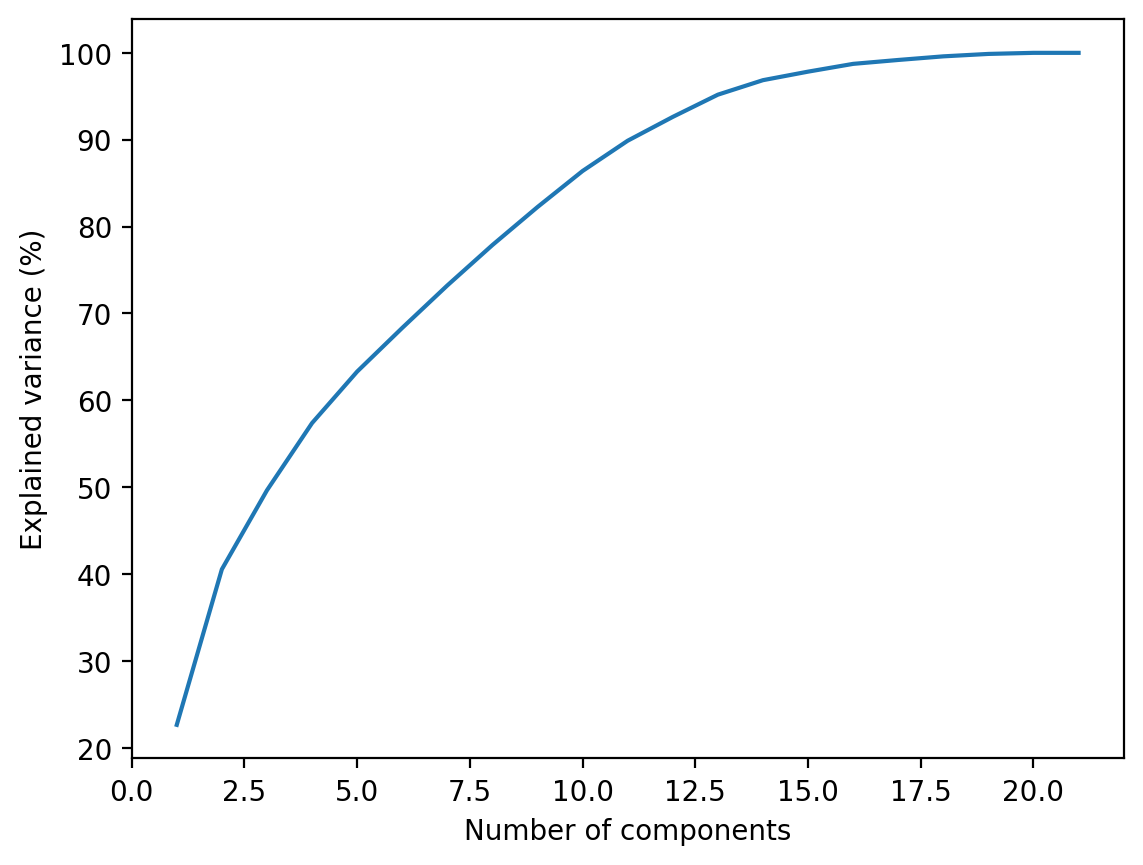

In [133]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Cumulative Variances (Percentage):
[22.64746592 40.55022024 49.64371359 57.38297061 63.30918892 68.33775046
 73.22483252 77.8756272  82.25041102 86.40049443]
Number of components: 10


Text(0, 0.5, 'Explained variance (%)')

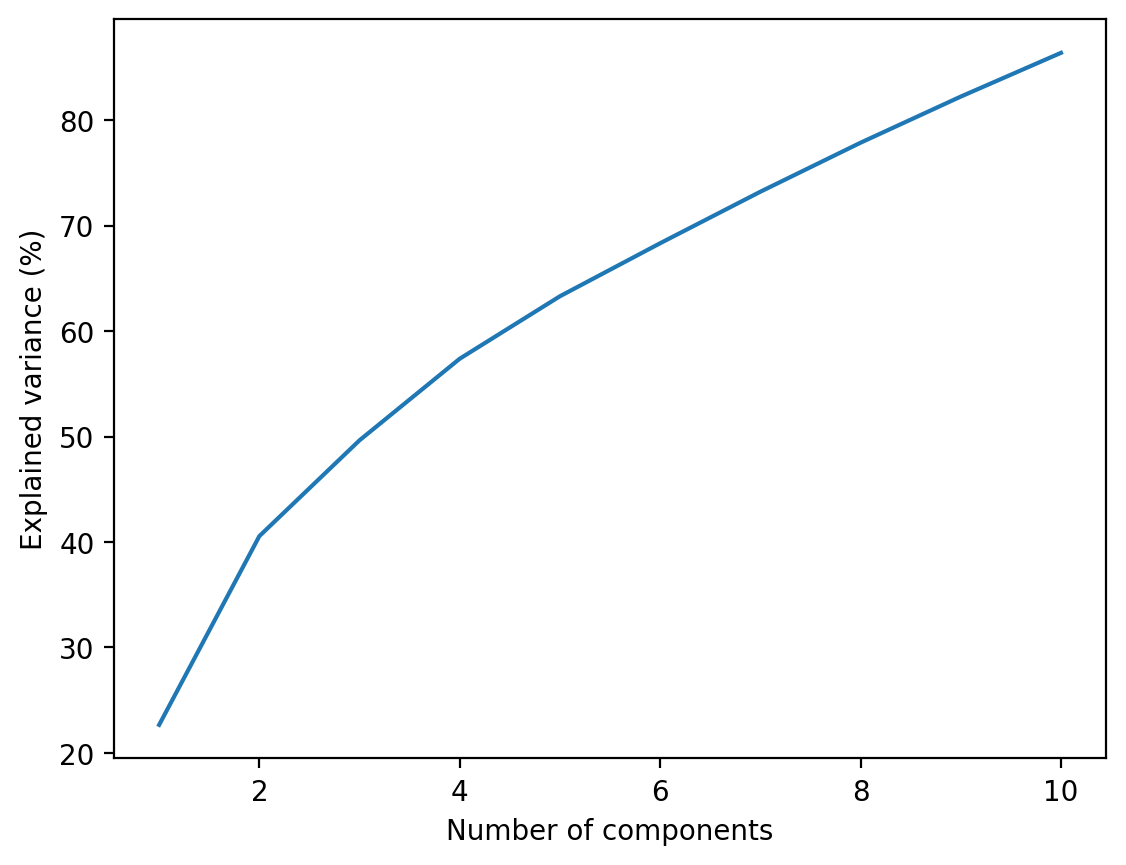

In [134]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.85)
pca.fit(X_scaled)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [135]:
pca_components = abs(pca.components_)
print(pca_components)

[[2.69646281e-01 2.22771119e-02 1.94826892e-02 2.56744673e-03
  2.74744786e-01 3.57998025e-01 3.67595245e-01 2.04420470e-01
  2.59059017e-01 3.81311216e-01 7.58870965e-02 1.16863494e-03
  1.38850689e-01 8.47384187e-02 3.53667659e-02 2.52784424e-01
  2.69646281e-01 2.13329490e-01 2.54610208e-01 2.30041645e-01
  1.46476886e-03]
 [3.27394049e-02 1.10665883e-01 1.57886239e-03 4.69277537e-01
  1.11314406e-01 3.42293192e-02 1.07446495e-02 2.98378677e-01
  3.87802898e-02 3.56842481e-02 5.18687848e-03 4.61652602e-01
  4.24925313e-01 2.50324749e-01 2.94089293e-01 9.95038354e-02
  3.27394049e-02 1.49307277e-01 9.91640737e-02 2.73795438e-01
  6.83003288e-03]
 [4.92818973e-01 8.15891620e-03 4.61176637e-02 4.39190446e-02
  7.78874580e-02 2.15876520e-01 1.87515520e-01 8.42637530e-02
  8.25642842e-02 2.03445496e-01 1.47908611e-02 4.81756487e-02
  2.21568028e-02 1.07112237e-01 7.20497729e-02 2.73247078e-01
  4.92818973e-01 4.55004607e-01 2.50291154e-01 5.14128893e-02
  1.79228716e-02]
 [2.69286677e-01

In [136]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {df.columns[indices].to_list()}')
    

Top 4 most important features in each component
Component 0: ['tempo', 'danceability', 'time_signature', 'length']
Component 1: ['Album', 'loudness', 'liveness', 'acousticness']
Component 2: ['mode', 'track_id', 'Popularity', 'speechiness']
Component 3: ['speechiness', 'favorite', 'minutes', 'acousticness']
Component 4: ['favorite', 'acousticness', 'minutes', 'speechiness']
Component 5: ['Artists', 'Song', 'instrumentalness', 'beat_density']
Component 6: ['beat_density', 'energy', 'Artists', 'key']
Component 7: ['instrumentalness', 'Artists', 'length', 'favorite']
Component 8: ['Song', 'Artists', 'valence', 'instrumentalness']
Component 9: ['key', 'valence', 'length', 'Song']


In [137]:
X_pca = pca.transform(X_scaled)
print(X_pca.shape)
print(X_pca)

(12594, 10)
[[-2.0993202   0.40925276  0.53393117 ... -0.89179554 -0.20939026
   0.59330271]
 [-2.24865449 -0.54606686  0.82727393 ...  2.3555079  -0.6077531
   1.13101187]
 [-1.56311673 -0.12980248  1.6642975  ... -0.32040289 -1.38786135
   0.64737166]
 ...
 [-0.21710108 20.6716954  -1.4192437  ...  0.28159442  0.67195872
  -0.44847371]
 [-0.37869543 18.96411085 -1.05846761 ... -0.66285744 -1.77852061
   5.03035678]
 [-0.55274855 17.34460385 -1.19510317 ...  0.24101592  0.1067132
   4.96108518]]
